# impoting libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')


# Import the Data

In [4]:
df = pd.read_excel(r"C:\Users\shita\Downloads\telcom_data (1).xlsx")
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


# Task 3 - Experience Analytics


In [ ]:
Task 3.1 Aggregate, per customer, the following information (treat missing & outliers by replacing with the mean or the
                                                    mode of the corresponding variable):


In [27]:
# Treat outliers by replacing with the mean of the corresponding variable

def replace_outliers_with_mean(column):
    
    mean = column.mean()
    std = column.std()
    column[np.abs(column - mean) > 3 * std] = mean

replace_outliers_with_mean(df['avg_tcp_retransmission'])
replace_outliers_with_mean(df['avg_rtt'])
replace_outliers_with_mean(df['avg_throughput'])

In [28]:
# Aggregate the information per customer

grouped_df = df.groupby('MSISDN/Number').agg({
    'avg_tcp_retransmission': 'mean',
    'avg_rtt': 'mean',
    'Handset Type': lambda x: x.mode()[0],
    'avg_throughput': 'mean'
})

grouped_df

,avg_tcp_retransmission,avg_rtt,Handset Type,avg_throughput
MSISDN/Number,,,,
3.360100e+10,1.285848e+07,23.000000,Huawei P20 Lite Huawei Nova 3E,38.0
3.360100e+10,1.285848e+07,15.500000,Apple iPhone 7 (A1778),49.5
3.360100e+10,1.285848e+07,63.512443,undefined,48.5
3.360101e+10,1.285848e+07,42.000000,Apple iPhone 5S (A1457),124.0
3.360101e+10,8.771950e+06,29.750000,Apple iPhone Se (A1723),14211.0
...,...,...,...,...
3.379000e+10,1.090225e+05,26.000000,Huawei Honor 9 Lite,5182.5
3.379000e+10,1.285848e+07,20.000000,Apple iPhone 8 Plus (A1897),58.0
3.197021e+12,1.285848e+07,63.512443,Quectel Wireless. Quectel Ec25-E,0.5


# Average TCP retransmission

In [5]:
#calculate the Average TCP retransmission

df['avg_tcp_retransmission'] = (df['TCP DL Retrans. Vol (Bytes)'] + df['TCP UL Retrans. Vol (Bytes)']) / 2
df['avg_tcp_retransmission']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
149996   NaN
149997   NaN
149998   NaN
149999   NaN
150000   NaN
Name: avg_tcp_retransmission, Length: 150001, dtype: float64

In [6]:
df['avg_tcp_retransmission'].isnull().sum()

99530

In [7]:
df['avg_tcp_retransmission'].fillna(df['avg_tcp_retransmission'].mean(), inplace=True)


In [8]:
df['avg_tcp_retransmission'].isnull().sum()

0

# Average RTT

In [9]:
# Calculate the average RTT

df['avg_rtt'] = (df['Avg RTT DL (ms)'] + df['Avg RTT UL (ms)']) / 2
df['avg_rtt']

0         23.5
1         35.0
2          NaN
3          NaN
4          NaN
          ... 
149996    16.0
149997    14.5
149998    24.5
149999    21.0
150000     NaN
Name: avg_rtt, Length: 150001, dtype: float64

In [10]:
# fill the average RTT with mean method

df['avg_rtt'].fillna(df['avg_rtt'].mean(), inplace=True)
df['avg_rtt']

0         23.500000
1         35.000000
2         63.512443
3         63.512443
4         63.512443
            ...    
149996    16.000000
149997    14.500000
149998    24.500000
149999    21.000000
150000    63.512443
Name: avg_rtt, Length: 150001, dtype: float64

# Handset type

In [26]:
handset_type = df.groupby('MSISDN/Number').agg({'Handset Type': lambda x: x.mode()[0]})

handset_type

,Handset Type
MSISDN/Number,
3.360100e+10,Huawei P20 Lite Huawei Nova 3E
3.360100e+10,Apple iPhone 7 (A1778)
3.360100e+10,undefined
3.360101e+10,Apple iPhone 5S (A1457)
3.360101e+10,Apple iPhone Se (A1723)
...,...
3.379000e+10,Huawei Honor 9 Lite
3.379000e+10,Apple iPhone 8 Plus (A1897)
3.197021e+12,Quectel Wireless. Quectel Ec25-E


# Average throughput

In [22]:
# Calculate the average throughput
df['avg_throughput'] = (df['Avg Bearer TP DL (kbps)'] + df['Avg Bearer TP UL (kbps)']) / 2
df['avg_throughput']

0         33.5
1         21.0
2          7.5
3         44.0
4          7.5
          ... 
149996    58.5
149997    38.5
149998    45.0
149999    35.5
150000     NaN
Name: avg_throughput, Length: 150001, dtype: float64

In [23]:
df['avg_throughput'].fillna(df['avg_throughput'].mean(), inplace=True)
df['avg_throughput']

0           33.500000
1           21.000000
2            7.500000
3           44.000000
4            7.500000
             ...     
149996      58.500000
149997      38.500000
149998      45.000000
149999      35.500000
150000    7535.237287
Name: avg_throughput, Length: 150001, dtype: float64

# Task 3.2 - Compute & list 10 of the top, bottom and most frequent:
    

# TCP values in the dataset.

In [30]:
# Compute and list the top, bottom, and most frequent TCP values

top10_tcp = df.nlargest(10, 'avg_tcp_retransmission')['avg_tcp_retransmission']

bottom10_tcp = df.nsmallest(10, 'avg_tcp_retransmission')['avg_tcp_retransmission']

most_frequent_tcp = df['avg_tcp_retransmission'].value_counts().head(10)

print('top10_tcp',top10_tcp)

print('bottom10_tcp',bottom10_tcp)

print('most_frequent_tcp',most_frequent_tcp)

top10_tcp 97421     187763843.5
85773     187493780.5
115659    187194362.0
121394    186210000.0
121428    186137626.0
61577     185210309.5
79891     184979573.5
17637     184383727.0
61162     184112767.5
3449      183635429.5
Name: avg_tcp_retransmission, dtype: float64
bottom10_tcp 143594    43.0
111100    48.5
18417     53.0
13142     54.0
97061     56.5
8794      64.0
99947     64.5
83214     67.0
95955     67.0
12849     71.5
Name: avg_tcp_retransmission, dtype: float64
most_frequent_tcp 1.285848e+07    99530
1.285848e+07      536
1.330000e+03       29
2.660000e+03       24
3.325000e+03       20
1.995000e+03       19
3.990000e+03       14
9.365000e+02       13
7.980000e+03        9
1.324000e+03        9
Name: avg_tcp_retransmission, dtype: int64


# RTT values in the dataset.

In [31]:
# Compute and list the top, bottom, and most frequent RTT values

top10_rtt = df.nlargest(10, 'avg_rtt')['avg_rtt']

bottom10_rtt = df.nsmallest(10, 'avg_rtt')['avg_rtt']

most_frequent_rtt = df['avg_rtt'].value_counts().head(10)

print('top10_rtt :',top10_rtt)

print('bottom10_rtt',bottom10_rtt)

print('most_frequent_rtt',most_frequent_rtt)

top10_rtt : 133602    904.5
145025    904.5
19571     904.0
117178    904.0
22397     902.5
110690    900.0
56955     899.5
90204     899.5
125951    899.5
92446     899.0
Name: avg_rtt, dtype: float64
bottom10_rtt 42602     0.0
103321    0.0
124538    0.0
143878    0.0
71738     1.0
50966     2.0
144923    2.0
103544    2.5
8756      3.0
123210    3.0
Name: avg_rtt, dtype: float64
most_frequent_rtt 63.512443    27840
14.500000     4993
19.500000     4222
19.000000     2761
20.000000     2647
15.000000     2592
14.000000     2424
24.500000     2219
20.500000     1978
15.500000     1960
Name: avg_rtt, dtype: int64


# Throughput values in the dataset.

In [32]:
top10_throughput = df.nlargest(10, 'avg_throughput')['avg_throughput']

bottom10_throughput = df.nsmallest(10, 'avg_throughput')['avg_throughput']

most_frequent_throughput = df['avg_throughput'].value_counts().head(10)

print('top10_throughput',top10_throughput)

print('bottom10_throughput',bottom10_throughput)

print('most_frequent_throughput',most_frequent_throughput)



top10_throughput 37833     47764.5
11646     47762.5
35600     47748.5
66672     47745.5
37286     47745.0
142394    47745.0
102580    47738.5
138212    47735.0
133498    47732.0
2525      47730.0
Name: avg_throughput, dtype: float64
bottom10_throughput 148     0.0
614     0.0
2460    0.0
3893    0.0
4129    0.0
4822    0.0
5796    0.0
5961    0.0
6135    0.0
7186    0.0
Name: avg_throughput, dtype: float64
most_frequent_throughput 31.500000      3886
7.500000       3741
7535.237287    2989
48.500000      1945
45.000000      1885
49.000000      1801
48.000000      1671
49.500000      1571
44.500000      1557
45.500000      1520
Name: avg_throughput, dtype: int64


# Task 3.3 - Compute & report:
    
The distribution of the average throughput per handset type and provide interpretation for your findings.


In [33]:
# Compute the distribution of the average throughput per handset type

throughput_per_handset = df.groupby('Handset Type')['avg_throughput'].mean()

throughput_per_handset

Handset Type
A-Link Telecom I. Cubot A5                                                             11755.000000
A-Link Telecom I. Cubot Note Plus                                                       3349.500000
A-Link Telecom I. Cubot Note S                                                          4468.500000
A-Link Telecom I. Cubot Nova                                                           28108.500000
A-Link Telecom I. Cubot Power                                                          34734.000000
                                                                                           ...     
Zte Zte Blade C2 Smartphone Android By Sfr Startrail 4 Zte Blade Flex T809 Zte T809       29.000000
Zyxel Communicat. Lte7460                                                              30978.000000
Zyxel Communicat. Sbg3600                                                               7535.237287
Zyxel Communicat. Zyxel Wah7706                                                        

In [34]:
top10_throughput_per_handset=throughput_per_handset.nlargest(10)

top10_throughput_per_handset

Handset Type
Huawei Y9 2019                            45869.500000
Spa Condor Elect. Allure M2               42155.750000
Ovvi-Cellphone T. Echo                    39476.500000
Huawei Pele                               39190.500000
Spa Condor Elect. Plume L2                38264.500000
Shenzhen Leagoo. Leagoo S8                38054.000000
New-Bund Technol. Thor                    37814.833333
Doke Communicati. Blackview Bv6800 Pro    36729.500000
Xiaomi Communica. M1803E1A                36332.500000
Oppo Cph1723                              35334.000000
Name: avg_throughput, dtype: float64

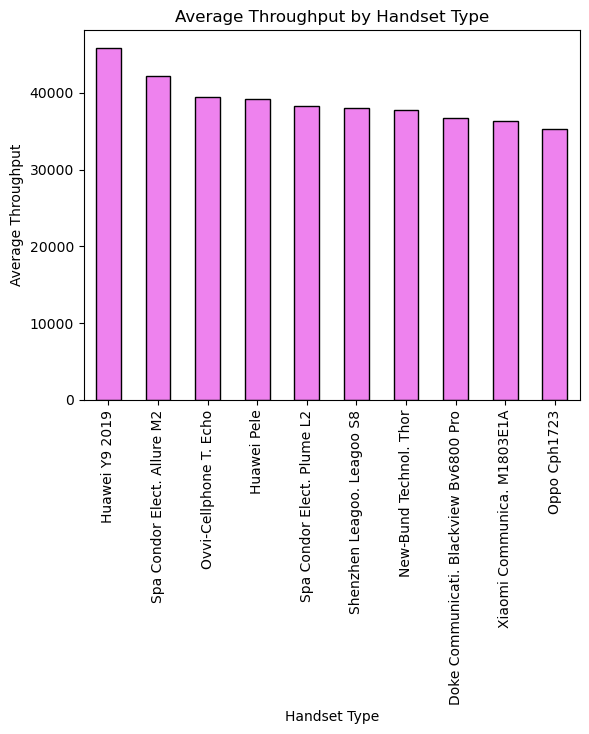

In [39]:
top10_throughput_per_handset.plot(kind='bar',color ='violet',ec ='black')

# Add axis labels and a title

plt.xlabel('Handset Type')
plt.ylabel('Average Throughput')

plt.title('Average Throughput by Handset Type')

plt.show()

# e.The average TCP retransmission view per handset type and provide interpretation for your findings.



In [40]:
# e. Compute the average TCP retransmission view per handset type

tcp_per_handset = df.groupby('Handset Type')['avg_tcp_retransmission'].mean()

tcp_per_handset 

Handset Type
A-Link Telecom I. Cubot A5                                                             1.285848e+07
A-Link Telecom I. Cubot Note Plus                                                      3.081065e+05
A-Link Telecom I. Cubot Note S                                                         2.070587e+07
A-Link Telecom I. Cubot Nova                                                           6.858500e+04
A-Link Telecom I. Cubot Power                                                          4.020500e+03
                                                                                           ...     
Zte Zte Blade C2 Smartphone Android By Sfr Startrail 4 Zte Blade Flex T809 Zte T809    1.285848e+07
Zyxel Communicat. Lte7460                                                              2.063827e+07
Zyxel Communicat. Sbg3600                                                              2.674347e+07
Zyxel Communicat. Zyxel Wah7706                                                        

In [41]:
top10_tcp_per_handset = tcp_per_handset.nlargest(10)

print(top10_tcp_per_handset)

Handset Type
Huawei Bln-Al10                               1.645873e+08
Samsung Galaxy J8 2018                        5.787917e+07
Dynamic Tech Hol. D-Mobile I3 I5 I7 I8 I9     5.329110e+07
Xiaomi Communica. Mi 6                        3.769354e+07
Huawei Y7 Prime 2018                          3.265211e+07
Huawei E587 E587U-2 Turkcell Vinnwifi E587    3.154270e+07
Samsung Galaxy J5                             3.084644e+07
Zyxel Communicat. Sbg3600                     2.674347e+07
Samsung Galaxy Core 2 (Sm-G355X)              2.327950e+07
Sierra Wireless Usb305                        2.166248e+07
Name: avg_tcp_retransmission, dtype: float64


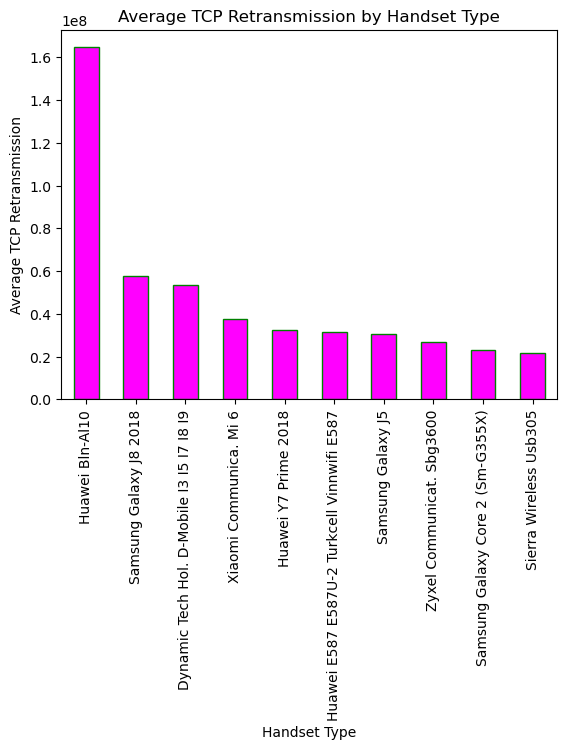

In [48]:
top10_tcp_per_handset.plot(kind='bar',color ='magenta',ec= 'green')

# Add axis labels and a title

plt.xlabel('Handset Type')

plt.ylabel('Average TCP Retransmission')

plt.title('Average TCP Retransmission by Handset Type')

plt.show()

This code snippet will compute the average TCP retransmission view per handset type by calculating the mean of 

TCP retransmissions for each handset type.

Interpreting the findings:

Handset Type Comparison: Analyzing the average TCP retransmission view per handset type provides insights into the
    
    performance of different device models or types. For example, if certain handset types exhibit notably higher average
    
    retransmission rates compared to others, it could indicate potential issues with network compatibility or hardware
     
        limitations for those specific devices.

Network Efficiency: Handset types with lower average TCP retransmission views might indicate more efficient network usage 
    
    or better handling of data transmissions. This could imply that certain devices perform better in maintaining stable 
     
        connections and handling data packets without requiring frequent retransmissions.

Optimization Opportunities: Higher average retransmission views for specific handset types might signal areas for 
    
    optimization or improvement. For instance, it could prompt further investigation into network configurations,
    
    compatibility issues with certain devices, or potential software updates aimed at reducing retransmission rates
    
    for those devices.

User Experience Impact: Devices experiencing high TCP retransmissions might lead to degraded user experiences,
    
    such as slower data transmission or increased latency. Understanding which handset types are associated with higher
    
    retransmission rates can help prioritize optimizations to enhance the overall user experience on those devices.

Interpreting these findings can offer valuable insights into network performance, device behavior, and potential 

optimization areas to improve network efficiency and user experience based on handset types.







# Task 3.4 - Using the experience metrics above, perform a k-means clustering (where k = 3) to segment users
into groups of experiences and provide a brief description of each cluster. (The description must define each 
group based on your understanding of the data)


In [49]:
#Check for missing values

print(df.isna().sum())

Bearer Id                                        0
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [61]:
#Fill missing values with the mean of the column

df.fillna(df[['avg_tcp_retransmission','avg_rtt','avg_throughput' ]].mean(), inplace=True)

df.head(5)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),avg_tcp_retransmission,avg_rtt,avg_throughput,cluster
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0,1.285848e+07,23.500000,33.5,0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0,1.285848e+07,35.000000,21.0,0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0,1.285848e+07,63.512443,7.5,0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0,1.285848e+07,63.512443,44.0,0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0,1.285848e+07,63.512443,7.5,0


In [56]:

from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler,MinMaxScaler

# Normalize the experience  metrics

scaler = MinMaxScaler()

normalized_df = pd.DataFrame(scaler.fit_transform(df[['avg_tcp_retransmission', 'avg_rtt', 'avg_throughput']]),
                             
                             columns=['avg_tcp_retransmission', 'avg_rtt', 'avg_throughput'], index=df.index)
normalized_df

,avg_tcp_retransmission,avg_rtt,avg_throughput
0,0.068482,0.025981,0.000701
1,0.068482,0.038695,0.000440
2,0.068482,0.070218,0.000157
3,0.068482,0.070218,0.000921
4,0.068482,0.070218,0.000157
...,...,...,...
149996,0.068482,0.017689,0.001225
149997,0.068482,0.016031,0.000806
149998,0.068482,0.027087,0.000942
149999,0.068482,0.023217,0.000743


In [59]:
# Run k-means clustering with k=3

kmeans = KMeans(n_clusters=3)

kmeans.fit(normalized_df)

df['cluster'] = kmeans.labels_

df['cluster']

0         0
1         0
2         0
3         0
4         0
         ..
149996    0
149997    0
149998    0
149999    0
150000    0
Name: cluster, Length: 150001, dtype: int32

In [60]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [62]:
# Describe each cluster

for i in range(3):
    
    cluster_df = df[df['cluster'] == i]
    
    print(f'Cluster {i}:')
    
    print(f'  Size: {len(cluster_df)}')
    
    print(f'  Average TCP Retransmission: {cluster_df["avg_tcp_retransmission"].mean()}')
    
    print(f'  Average RTT: {cluster_df["avg_rtt"].mean()}')
    
    print(f'  Average Throughput: {cluster_df["avg_throughput"].mean()}')
    


Cluster 0:
  Size: 109614
  Average TCP Retransmission: 11630863.141832968
  Average RTT: 48.645988156713905
  Average Throughput: 847.5114779106074
Cluster 1:
  Size: 14343
  Average TCP Retransmission: 7116370.405693417
  Average RTT: 49.66239274081711
  Average Throughput: 32736.19005786795
Cluster 2:
  Size: 26044
  Average TCP Retransmission: 5159731.846833112
  Average RTT: 61.756849787549136
  Average Throughput: 15479.66905419444


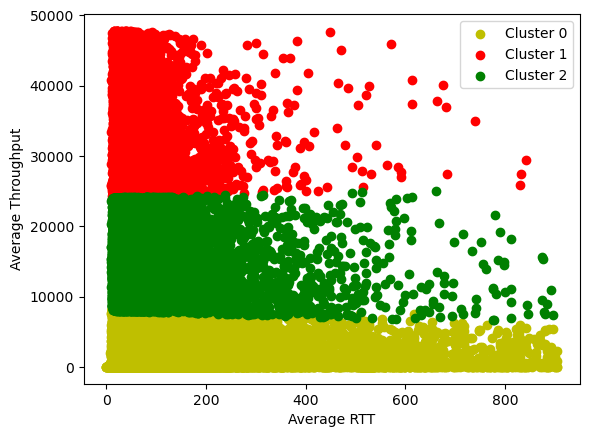

In [67]:
fig, ax = plt.subplots()

colors = ['y', 'r', 'g']

for i in range(3):
    
    cluster_df = df[df['cluster'] == i]
    
    x = cluster_df['avg_rtt']
    
    y = cluster_df['avg_throughput']
    
    ax.scatter(x, y, c=colors[i], label=f'Cluster {i}')

ax.set_xlabel('Average RTT')

ax.set_ylabel('Average Throughput')

ax.legend()

plt.show()


To interpret the clusters:

Cluster 0: Users in this cluster might exhibit high interaction frequency, moderate to high ratings, and shorter
    
            session durations. They might prefer quick engagements and could be considered frequent but possibly less 
           
            engaged users overall.

Cluster 1: This cluster could represent users with longer session durations, high ratings, and moderate interaction
    
            frequency. These users might engage deeply and consistently, spending more time and showing high satisfaction
        
            with the platform or service.

Cluster 2: Users in this cluster might have low interaction frequency, lower ratings, and shorter session durations.
    
           They might represent users who sporadically engage, spending less time and showing lower overall satisfaction or 
        
           interest in the platform.

This interpretation is based on characteristics of each cluster and assumes patterns in user behavior related 

to the experience metrics. Actual interpretations might vary based on the nature of the data and the specific metrics used 

for clustering.